In [62]:
import networkx as nx

import numpy as np
import pandas as pd

import joblib 
import h5py

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from src.interact_with_matrices import find_degree_for_word, open_object
from src.matrix_reduce import reduce_dimension_adjacency_matrix

# Loading data

In [2]:
degree_matrix = open_object('data/degree_matrix.hdf5')
adjacency_matrix = open_object('data/adjacency_matrix.hdf5')

In [3]:
with open('data/keys.pkl', 'rb') as infile:
    keys = joblib.load(infile)

In [4]:
G = nx.from_numpy_matrix(adjacency_matrix)

In [5]:
df = pd.DataFrame({
    'node_index': range(len(keys)),
    'word': keys,
})

# Computing statistics

In [6]:
closeness_centrality = nx.closeness_centrality(G)

In [7]:
betweenness_centrality = nx.betweenness_centrality(G)

In [8]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [12]:
df['closeness_centrality'] = closeness_centrality.values()
df['betweenness_centrality'] = betweenness_centrality.values()
df['eigenvector_centrality'] = eigenvector_centrality.values()

In [18]:
df['degree'] = np.diag(degree_matrix)
df['degree'] = df['degree'].astype(int)

In [19]:
df.head()

,node_index,word,closeness_centrality,betweenness_centrality,eigenvector_centrality,degree
0,0,a,0.000000,0.000000,1.550265e-36,0
1,1,ab,0.249402,0.000047,2.204102e-03,1
2,2,abandoned,0.000000,0.000000,1.550265e-36,0
3,3,abilities,0.226514,0.000000,8.275105e-04,0
4,4,ability,0.296701,0.001358,2.449125e-02,13


# Visualization of the distributions

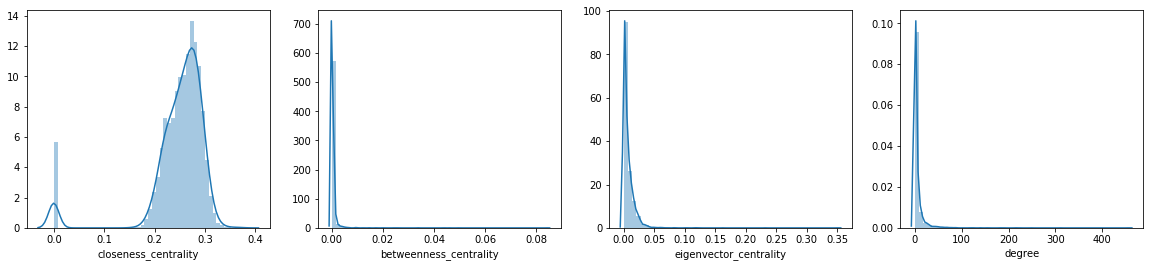

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

sns.distplot(df['closeness_centrality'], ax=ax[0])
sns.distplot(df['betweenness_centrality'], ax=ax[1])
sns.distplot(df['eigenvector_centrality'], ax=ax[2])
sns.distplot(df['degree'], ax=ax[3])

# Clustering

## K-means, Normalized K-means, DBSCAN

In [34]:
features = ['closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality', 'degree']

In [58]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn import preprocessing

Text(0.5,1,'Inertia of k-Means versus number of clusters')

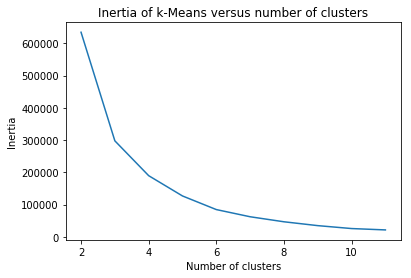

In [45]:
scores = [KMeans(n_clusters=i+2).fit(df[features]).inertia_ for i in range(10)]

sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')

In [46]:
kmeans = KMeans(n_clusters=4).fit(df[features])

In [51]:
dbscan = DBSCAN(min_samples=40).fit(df[features])

In [52]:
# Print results
print('kmeans: {}'.format(
    silhouette_score(
        df[features], 
        kmeans.labels_, 
        metric='euclidean'
    )
))

print('DBSCAN: {}'.format(
    silhouette_score(
        df[features], 
        dbscan.labels_, 
        metric='cosine'
    )
))

kmeans: 0.7948548668115502
Cosine kmeans:0.02170381363596713
DBSCAN: 0.6636217235271233


## Visualization of clustering

### PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99983238e-01 1.65898983e-05 1.69312329e-07]


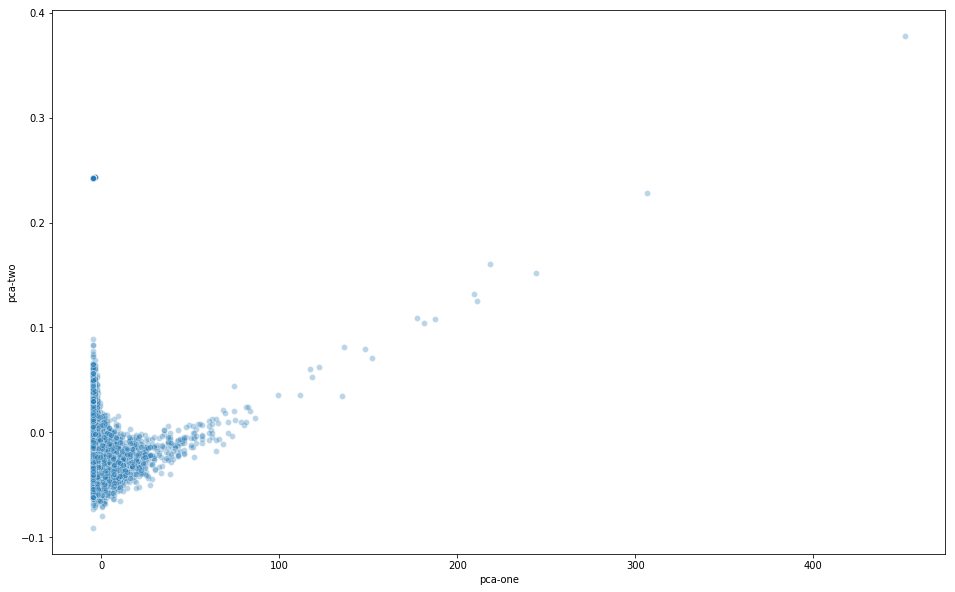

In [66]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

###  t-SNE

In [63]:
from sklearn.manifold import TSNE

In [60]:
tsne_3d_df = prepare_tsne(3, df[features], kmeans.labels_)
tsne_3d_df['dbscan'] = dbscan.labels_

NameError: name 'prepare_tsne' is not defined

In [61]:
plot_animation(tsne_3d_df, 'kmeans', 'kmeans')
plot_animation(tsne_3d_df, 'dbscan', 'dbscan')

NameError: name 'plot_animation' is not defined